In [1]:
import os
import sys
sys.path.append('/home/li.yu/code/JupiterCVML/europa/base/src/europa')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
csv = '/data/jupiter/li.yu/data/Jupiter_train_v5_7/trainrd05_humanaug_dp.csv'
df = pd.read_csv(csv, low_memory=False)
df.shape

(288919, 295)

In [3]:
human_df = df[df.is_human_present_in_annotations == True]
occluded_human_df = df[(df.camera_location == 'rear-left') & (df.occluded == True)]
reverse_human_df = df[(df.camera_location == 'rear-left') & (df.max_row < 256)]
triangle_human_df = df[(df.camera_location == 'rear-left') & (df.pixel_count_in_triangles >= 400)]
human_df.shape, occluded_human_df.shape, reverse_human_df.shape, triangle_human_df.shape

((51235, 295), (9854, 295), (9272, 295), (3369, 295))

In [7]:
df[df.pixel_count <= 30].shape

(208, 294)

In [5]:
add_df = df[(df.camera_location == 'rear-left') & ((df.occluded == True) | (df.max_row < 256) | (df.pixel_count_in_triangles >= 400))]
print(add_df.shape)
add_df.groupby('operation_time').count()

(13244, 295)


,actor,aletheia_datapoint_id,annotation_pixelwise_0__cls,annotation_pixelwise_0__id,annotation_pixelwise_0_aletheia_id,annotation_pixelwise_0_annotation_job,annotation_pixelwise_0_audit_at,annotation_pixelwise_0_audit_by,annotation_pixelwise_0_audit_mistake_found,annotation_pixelwise_0_audit_mistakes,...,is_laying_down_human,is_multi_human,occluded,pixel_count_in_triangles,is_vehicle_present_in_annotations,vehicle_pixel_count,vehicle_min_row,vehicle_max_row,vehicle_min_col,vehicle_max_col
operation_time,,,,,,,,,,,,,,,,,,,,,
dawn_dusk,154,0,470,470,0,470,0,0,470,470,...,470,470,470,470,470,100,100,100,100,100
daytime,632,0,7529,7529,0,7529,0,0,7529,7529,...,7529,7529,7529,7529,7529,1781,1781,1781,1781,1781
nightime,1830,0,4702,4702,0,4702,0,0,4702,4702,...,4702,4702,4702,4702,4702,721,721,721,721,721


<AxesSubplot:>

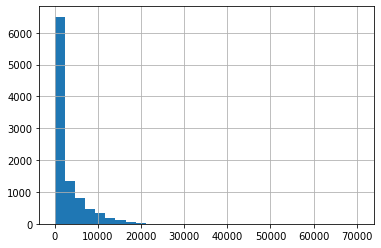

In [19]:
occluded_human_df.pixel_count.hist(bins=30)

In [9]:
sub_df = occluded_human_df[(occluded_human_df.pixel_count > 1000) & (occluded_human_df.pixel_count < 2000)]
print(sub_df.shape)
_df = sub_df.sample(min(50, len(sub_df)))
for i, row in _df.iterrows():
    # print(row.id, row.pixel_count, row.min_row, row.max_row)
    print(row.id)

(2016, 294)
61c49b73909d1e70f7661c91
5fd107819733118b41173374
5fdbfc5376186e53450c6a0d
629fa92f6921d176ea3f0490
5f6003194414765bae6b36ca
5fd10907c867c6687dc1b5ee
6389b60a891ec7e2c64c1290
61a6aae0e9deaa6e0d778204
6285d9e007adc86eacc7b34c
5f878f31df7eefe071ee8cec
61c2e9881d52d71870087d0f
6067851ce03d73ee3eeea6e9
614ec755ff792dce08b5c498
5f81f1a5bf0c3674c0577846
62fe15b67347b96f412e7463
629f8f346d1b7891f46693bf
627d74a338d3cbdf05e4e6e8
61a69c9fd0ac7aef16c0ac92
5fd1098472cac949b3a4824f
5f8777af0607743f7227c7fa
5fdbea262c16bfe506c77f56
634e5e72a5009fcafc2a4574
639278da656423c4bc98d9cd
606784ff5b13d611d3fdb86c
61b0439e3bb1395d4c7e4364
5f051f8f1cdc8a7a2e04d71a
61c33ef191ed7a7087f5dfe8
6392b0ade296850f1d1327f2
61280b40a595a19c028a14db
639279db46086c2150ace26d
627ffdf6497c394799cf029f
627d7cb838d3cbdf05e513f6
638b1f6551ffb7d370cd2f3b
5fd108e479d4c171a1626e89
6359eafc2621341def442386
627e1da9ec0a49ecdd2e8ef2
627ea9be6c49686d20a2256b
5f877888786447eb4b8e8d3a
5fd1092c19d72dca002beb54
63a230f146617

In [28]:
from dl.dataset.datamodes.npz.rgbd import RGBDNPZ
import json

input_dataloader = RGBDNPZ
data_dir = '/data/jupiter/datasets/Jupiter_train_v5_7'
normalization_params = {"policy": "tonemap", "alpha": 0.25, "beta": 0.9, "gamma": 0.9, "eps": 1e-6}
input_mode_loader = input_dataloader(
    data_dir=data_dir, run_productivity_metrics=False,
    normalization_params=normalization_params, input_size=[512,1024])

In [29]:
row = sub_df[sub_df.id == '5fdbe74f7540eb52c98296a4'].iloc[0]
artifacts = input_mode_loader.get_artifacts(row)
image = artifacts['image']
label = artifacts['label']

label_map = json.loads(row['label_map'])

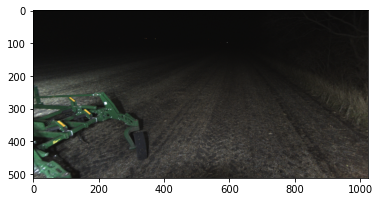

In [32]:
plt.imshow(image)
plt.show()

In [2]:
csv = '/data/jupiter/datasets/Jupiter_train_v5_10/master_annotations.csv'
df = pd.read_csv(csv, low_memory=False)
df.shape

(311469, 310)